# What is Pandas

1. Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
2. Characteristics (Reference from https://www.scaler.com/topics/pandas/what-is-pandas-in-python/)

> 2-1 Quick and efficient data manipulation and analysis.

> 2-2 Tools for loading data from different file formats.

> 2-3 Label-based Slicing, Indexing, and Subsetting can be performed on large datasets.

> 2-4 Merges and joins two datasets easily.

> 2-5 Pivoting and reshaping data sets

> 2-6 Easy handling of missing data (represented as NaN) in both floating point and non-floating point data.

> 2-7 Size mutability: DataFrame and higher-dimensional object columns can be added and deleted.

> 2-8 Effective grouping by functionality for splitting, applying, and combining data sets.

In [ ]:
import numpy as np
import pandas as pd
pd.__version__

'1.5.3'

# Pandas Objects

Pandas has two main objects such as series object and data frame object

1. A series object is a 1D array of indexed data
2. A data frame object is 2D, size-mutable, and heterogeneous tabular data

# Series Object

In [ ]:
#Convert a list to series object
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0]) #Convert a list to series data
s

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [ ]:
#To check indices
s.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
#To check values
s.values

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
#Can use a slicing technique
s[1:4]

1    0.25
2    0.50
3    0.75
dtype: float64

In [ ]:
#It is possible to assign your own indices
s = pd.Series([0, 0.25, 0.5, 0.75, 1.0],
              index=['a', 'b', 'c', 'd', 'e']) #Change index
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

In [ ]:
#To check unique values in a series object, use unique() method
s.unique() #since every element is unique, it displays all elements

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
#To count each unique value
s.value_counts()

0.00    1
0.25    1
0.50    1
0.75    1
1.00    1
dtype: int64

In [ ]:
#To check whether specific values in a series object, use isin()
s.isin([0.25, 0.75])

a    False
b     True
c    False
d     True
e    False
dtype: bool

In [ ]:
#To add new data to the series object
s['f'] = 1.25
s

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
f    1.25
dtype: float64

In [ ]:
#Filtering is possible
s[(s>0.4) & (s < 0.8)] #Filtering

c    0.50
d    0.75
dtype: float64

In [ ]:
#iloc: purely integer-location based indexing for selection by position over the given Series object.
s.iloc[1]

0.25

In [ ]:
#You can also use a slicing technique with iloc
s.iloc[2:4]

c    0.50
d    0.75
dtype: float64

In [ ]:
#Redefine the s series object

#reindex: Conform Series to new index with optional filling logic.
s = pd.Series(['a', 'b', 'c', 'd', 'e'],
              index=[1, 3, 5, 7, 9])
s
s.reindex(range(10)) #Index will be numbers

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [ ]:
s.reindex(range(10), method='bfill') #backfill / bfill: Use next valid observation to fill gap.

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

In [ ]:
s.reindex(range(10), method='backfill') #backfill / bfill: Use next valid observation to fill gap.

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

In [ ]:
s.reindex(range(10), method='pad') #pad / ffill: Propagate last valid observation forward to next valid.

0    NaN
1      a
2      a
3      b
4      b
5      c
6      c
7      d
8      d
9      e
dtype: object

In [ ]:
s.reindex(range(10), method='ffill') #pad / ffill: Propagate last valid observation forward to next valid.

0    NaN
1      a
2      a
3      b
4      b
5      c
6      c
7      d
8      d
9      e
dtype: object

In [ ]:
s.reindex(range(10), method='nearest') #nearest: Use nearest valid observations to fill gap.

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

# Simple Series Object Exercise

Suppose you want to make a series object to show the population in Naperville, Rockford, and Chicago based on the following information.

1. Naperville: 500,000
2. Rockford: 300,000
3. Chicago: 3,000,000

In [ ]:
#converting a dictionary to series object
pop_tuple = {'Naperville': 500000,
             'Rockford': 300000,
             'Chicago': 3000000}
population = pd.Series(pop_tuple)
population

Naperville     500000
Rockford       300000
Chicago       3000000
dtype: int64

In [ ]:
population['Naperville']

500000

In [ ]:
#using slicing to find all vals
population['Naperville':'Chicago']

Naperville     500000
Rockford       300000
Chicago       3000000
dtype: int64

# DataFrame Object

In [ ]:
pd.DataFrame([{'A': 2, 'B': 4, 'D': 3},
              {'A': 4, 'B': 5, 'C': 7}]) #Make a DataFrame using a dictionary

,A,B,D,C
0,2,4,3.0,NaN
1,4,5,NaN,7.0


In [ ]:
pd.DataFrame(np.random.rand(5, 5),
             columns=['A', 'B', 'C', 'D', 'E'],
             index=[1, 2, 3, 4, 5])

,A,B,C,D,E
1,0.039574,0.896251,0.733233,0.947466,0.887880
2,0.963346,0.438650,0.137361,0.853847,0.993419
3,0.570931,0.613721,0.698982,0.161912,0.065806
4,0.162391,0.115749,0.410117,0.880496,0.805749
5,0.128614,0.978560,0.700390,0.713007,0.276238


Continuing the population series object we created earlier, let's add male and female populations to each city.

1. Male popution

> Naperville: 300,000

> Rockford: 170,000

> Chicago: 1,470,000

2. Female population

> Naperville: 200,000

> Rockford: 130,000

> Chicago: 1,530,000

In [ ]:
male_tuple = {'Naperville': 300000,
              'Rockford': 170000,
              'Chicago': 1470000}
male = pd.Series(male_tuple)
male

Naperville     300000
Rockford       170000
Chicago       1470000
dtype: int64

In [ ]:
female_tuple = {'Naperville': 200000,
              'Rockford': 130000,
              'Chicago': 1530000}
female = pd.Series(female_tuple)
female

Naperville     200000
Rockford       130000
Chicago       1530000
dtype: int64

In [ ]:
#Combining data frames
Illinois_df = pd.DataFrame({'Population': population,
                           'Male_population': male,
                           'Female_population': female})
Illinois_df

,Population,Male_population,Female_population
Naperville,500000,300000,200000
Rockford,300000,170000,130000
Chicago,3000000,1470000,1530000


In [ ]:
#To check dataframe indices
Illinois_df.index

Index(['Naperville', 'Rockford', 'Chicago'], dtype='object')

In [ ]:
#To check dataframe columns
Illinois_df.columns

Index(['Population', 'Male_population', 'Female_population'], dtype='object')

In [ ]:
#To see the female population only
Illinois_df['Female_population']

Naperville     200000
Rockford       130000
Chicago       1530000
Name: Female_population, dtype: int64

In [ ]:
#To see the entire dataframe using the slicing technique
Illinois_df['Naperville': 'Chicago']

,Population,Male_population,Female_population
Naperville,500000,300000,200000
Rockford,300000,170000,130000
Chicago,3000000,1470000,1530000


# Index Operations

Index Operation

|Operators|Method|Description|
|---|---|---|
||append| append a single or a collection of indices together|
||difference|return the set difference of two Index objects|
|&|intersection|return the intersection of two Index objects.|
|\||union|return the union of two Index objects|
||isin|return a boolean array where the index values are in values|
||delete|make new Index with passed location(-s) deleted|
||drop|make new Index with passed list of labels deleted|
||insert|make new Index inserting new item at location|
||is_monotonic_increasing|return a boolean if the values are equal or increasing|
||is_monotonic_decreasing|return a boolean if the values are equal or decreasing|
||is_unique|return if the index has unique values|
||unique|return unique values in the index|

In [ ]:
idx1 = pd.Index([1, 2, 4, 6, 8])
idx2 = pd.Index([2, 4, 5, 6, 7])
idx3 = pd.Index([1, 1, 3, 4, 5, 5, 7])

print(idx1.append(idx2))
print(idx1.difference(idx2))

print(idx1.intersection(idx2))
print(idx1&idx2) #same as intersection

print(idx1.union(idx2))
print(idx1|idx2) #same as union

print(idx1.isin(idx2))

print(idx1.delete(0))
print(idx1.drop(1))

print(idx1 ^ idx2) #eliminate common values

print(idx1.insert(5, 10))
print(idx1.is_monotonic_increasing)
print(idx1.is_monotonic_decreasing)
print(idx1.is_unique)
print(idx2.is_unique)
print(idx3.is_unique)

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
[False  True  True  True False]
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 6, 8, 10], dtype='int64')
True
False
True
True
False


<ipython-input-184-2f2f410bda7a>:9: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  print(idx1&idx2) #same as intersection
<ipython-input-184-2f2f410bda7a>:12: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  print(idx1|idx2) #same as union
<ipython-input-184-2f2f410bda7a>:19: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  print(idx1 ^ idx2) #eliminate common values


# DataFrame Indexing

|Syntax|Description|
|---|---|
|df[val]|Select one column or multiple columns|
|df.loc[val]|Select a subset of rows by a label value|
|df.loc[:, val]|Select a subset of columns by a label value|
|df.loc[val1, val2]|Select a subset of rows and columns by a label value|
|df.iloc[where]|Select a subset of rows by integer position|
|df.iloc[:, where]|Select a subset of columns by integer position|
|df.iloc[where_i, where_j]|Select a subset of rows and columns by integer position|
|df.at[label_i, label_j]|Select a single value for a row/column label pair|
|df.iat[i, j]|Select a single value for a row/column pair by integer position|
|reindex|Conform Series/DataFrame to new index with optional filling logic|
|get_value, set_value|Select values ​​by row and column names|

In [ ]:
#Open the Illinois_df
Illinois_df

,Population,Male_population,Female_population
Naperville,500000,300000,200000
Rockford,300000,170000,130000
Chicago,3000000,1470000,1530000


In [ ]:
#Demonstrate df[val]. If you want to see the male population
Illinois_df['Male_population']

Naperville     300000
Rockford       170000
Chicago       1470000
Name: Male_population, dtype: int64

In [ ]:
#Let's calculate the male to female population ratio
Illinois_df['Ratio'] = (Illinois_df['Male_population']*100 / Illinois_df['Female_population'])
Illinois_df

,Population,Male_population,Female_population,Ratio
Naperville,500000,300000,200000,150.000000
Rockford,300000,170000,130000,130.769231
Chicago,3000000,1470000,1530000,96.078431


In [ ]:
#Swap axis
Illinois_df.T #Transpose

,Naperville,Rockford,Chicago
Population,500000.0,300000.000000,3.000000e+06
Male_population,300000.0,170000.000000,1.470000e+06
Female_population,200000.0,130000.000000,1.530000e+06
Ratio,150.0,130.769231,9.607843e+01


In [ ]:
Illinois_df.values[0] #Naperville data

array([5.0e+05, 3.0e+05, 2.0e+05, 1.5e+02])

In [ ]:
#To see the entire population and male population in Naverville and Rockford using loc
Illinois_df.loc[:'Rockford', :'Male_population']

,Population,Male_population
Naperville,500000,300000
Rockford,300000,170000


In [ ]:
"""
1. To see the entire population, the male population, and the female population
where the female population is greater than 150,000
2. Case sensitive
"""

Illinois_df.loc[(Illinois_df.Female_population>150000)]

,Population,Male_population,Female_population,Ratio
Naperville,500000,300000,200000,150.000000
Chicago,3000000,1470000,1530000,96.078431


In [ ]:
"""
1. To find a city where the entire population is greater than 500,000 and
the ratio is greater than 100
"""
Illinois_df.loc[(Illinois_df.Population >= 500000) & (Illinois_df.Ratio > 100)]

,Population,Male_population,Female_population,Ratio
Naperville,500000,300000,200000,150.0


In [ ]:
#Use iloc
Illinois_df.iloc[0:3, 0:5]

,Population,Male_population,Female_population,Ratio
Naperville,500000,300000,200000,150.000000
Rockford,300000,170000,130000,130.769231
Chicago,3000000,1470000,1530000,96.078431


In [ ]:
Illinois_df = Illinois_df.drop(['Ratio'], axis=1)
Illinois_df

,Population,Male_population,Female_population
Naperville,500000,300000,200000
Rockford,300000,170000,130000
Chicago,3000000,1470000,1530000


In [ ]:
Illinois_df['Ratio'] = (Illinois_df['Male_population']*100 / Illinois_df['Female_population'])
Illinois_df

,Population,Male_population,Female_population,Ratio
Naperville,500000,300000,200000,150.000000
Rockford,300000,170000,130000,130.769231
Chicago,3000000,1470000,1530000,96.078431


# Multi Indexing

It is used to process high-dimensional data including 1-dimensional Series and 2-dimensional DataFrame objects.

Suppose you want to make the following dataframe.

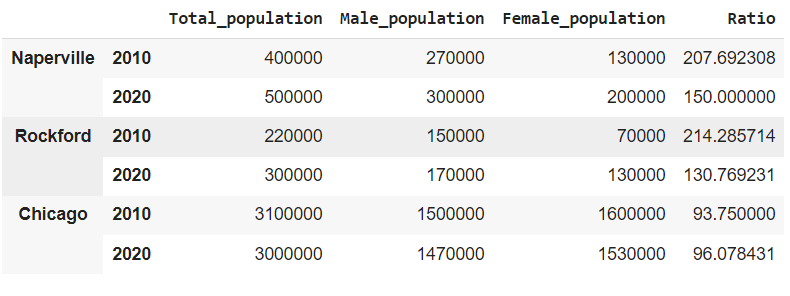

In [ ]:
#1st step: Add new index in a tuple format
idx_tuples = [('Naperville', 2010), ('Naperville', 2020),
                ('Rockford', 2010), ('Rockford', 2020),
                ('Chicago', 2010), ('Chicago', 2020)]
idx_tuples

[('Naperville', 2010),
 ('Naperville', 2020),
 ('Rockford', 2010),
 ('Rockford', 2020),
 ('Chicago', 2010),
 ('Chicago', 2020)]

In [ ]:
#2nd step: add new populations corresponding to idx_tuples
pop_tuples = [400000, 500000,
              220000, 300000,
              3100000, 3000000]
population = pd.Series(pop_tuples, index=idx_tuples)
population

(Naperville, 2010)     400000
(Naperville, 2020)     500000
(Rockford, 2010)       220000
(Rockford, 2020)       300000
(Chicago, 2010)       3100000
(Chicago, 2020)       3000000
dtype: int64

In [ ]:
#Define multi index
midx = pd.MultiIndex.from_tuples(idx_tuples)
midx

MultiIndex([('Naperville', 2010),
            ('Naperville', 2020),
            (  'Rockford', 2010),
            (  'Rockford', 2020),
            (   'Chicago', 2010),
            (   'Chicago', 2020)],
           )

In [ ]:
population = population.reindex(midx)
population

Naperville  2010     400000
            2020     500000
Rockford    2010     220000
            2020     300000
Chicago     2010    3100000
            2020    3000000
dtype: int64

In [ ]:
"""
Series object so far, so if you want to have a typical data frame,
you need to use the unstack() function
"""
Illinois_mdf = population.unstack() #Convert Series data to typical dataframe
Illinois_mdf

,2010,2020
Chicago,3100000,3000000
Naperville,400000,500000
Rockford,220000,300000


In [ ]:
#Opposite
Illinois_mdf.stack() #Convert typical dataframe to Series data

Chicago     2010    3100000
            2020    3000000
Naperville  2010     400000
            2020     500000
Rockford    2010     220000
            2020     300000
dtype: int64

In [ ]:
#From now on, add other columns

male_tuples = [270000, 300000,
              150000, 170000,
              1500000, 1470000]
male_tuples

[270000, 300000, 150000, 170000, 1500000, 1470000]

In [ ]:
Illinois_mdf = pd.DataFrame({'Total_population': population,
                             'Male_population': male_tuples})
Illinois_mdf

Total_population  Male_population
Naperville 2010            400000           270000
           2020            500000           300000
Rockford   2010            220000           150000
           2020            300000           170000
Chicago    2010           3100000          1500000
           2020           3000000          1470000

In [ ]:
female_tuples = [130000, 200000,
              70000, 130000,
              1600000, 1530000]
female_tuples

[130000, 200000, 70000, 130000, 1600000, 1530000]

In [ ]:
Illinois_mdf = pd.DataFrame({'Total_population': population,
                             'Male_population': male_tuples,
                             'Female_population': female_tuples}) #Can't skip existing columns
Illinois_mdf

Total_population  Male_population  Female_population
Naperville 2010            400000           270000             130000
           2020            500000           300000             200000
Rockford   2010            220000           150000              70000
           2020            300000           170000             130000
Chicago    2010           3100000          1500000            1600000
           2020           3000000          1470000            1530000

In [ ]:
Ratio = Illinois_mdf['Male_population']*100 / Illinois_mdf['Female_population']
Ratio

Naperville  2010    207.692308
            2020    150.000000
Rockford    2010    214.285714
            2020    130.769231
Chicago     2010     93.750000
            2020     96.078431
dtype: float64

In [ ]:
Illinois_mdf = pd.DataFrame({'Total_population': population,
                             'Male_population': male_tuples,
                             'Female_population': female_tuples,
                             'Ratio': Ratio})
Illinois_mdf

Total_population  Male_population  Female_population  \
Naperville 2010            400000           270000             130000   
           2020            500000           300000             200000   
Rockford   2010            220000           150000              70000   
           2020            300000           170000             130000   
Chicago    2010           3100000          1500000            1600000   
           2020           3000000          1470000            1530000   

                      Ratio  
Naperville 2010  207.692308  
           2020  150.000000  
Rockford   2010  214.285714  
           2020  130.769231  
Chicago    2010   93.750000  
           2020   96.078431

In [ ]:
#To add other columns names such as city and year
population.index.names = ['City', 'Year']
population

City        Year
Naperville  2010     400000
            2020     500000
Rockford    2010     220000
            2020     300000
Chicago     2010    3100000
            2020    3000000
dtype: int64

In [ ]:
Illinois_mdf

Total_population  Male_population  Female_population  \
City       Year                                                         
Naperville 2010            400000           270000             130000   
           2020            500000           300000             200000   
Rockford   2010            220000           150000              70000   
           2020            300000           170000             130000   
Chicago    2010           3100000          1500000            1600000   
           2020           3000000          1470000            1530000   

                      Ratio  
City       Year              
Naperville 2010  207.692308  
           2020  150.000000  
Rockford   2010  214.285714  
           2020  130.769231  
Chicago    2010   93.750000  
           2020   96.078431

In [ ]:
#Without sorted results, slicing does not work correctly.
Illinois_mdf['Naperville':'Chicago']

UnsortedIndexError: 'Key length (1) was greater than MultiIndex lexsort depth (0)'

In [ ]:
#To display results correctly, Sort the index first
Illinois_mdf = Illinois_mdf.sort_index()
Illinois_mdf

Total_population  Male_population  Female_population  \
City       Year                                                         
Chicago    2010           3100000          1500000            1600000   
           2020           3000000          1470000            1530000   
Naperville 2010            400000           270000             130000   
           2020            500000           300000             200000   
Rockford   2010            220000           150000              70000   
           2020            300000           170000             130000   

                      Ratio  
City       Year              
Chicago    2010   93.750000  
           2020   96.078431  
Naperville 2010  207.692308  
           2020  150.000000  
Rockford   2010  214.285714  
           2020  130.769231

In [ ]:
Illinois_mdf['Naperville':'Rockford']

Total_population  Male_population  Female_population  \
City       Year                                                         
Naperville 2010            400000           270000             130000   
           2020            500000           300000             200000   
Rockford   2010            220000           150000              70000   
           2020            300000           170000             130000   

                      Ratio  
City       Year              
Naperville 2010  207.692308  
           2020  150.000000  
Rockford   2010  214.285714  
           2020  130.769231

In [ ]:
Illinois_mdf['Chicago':'Rockford']

Total_population  Male_population  Female_population  \
City       Year                                                         
Chicago    2010           3100000          1500000            1600000   
           2020           3000000          1470000            1530000   
Naperville 2010            400000           270000             130000   
           2020            500000           300000             200000   
Rockford   2010            220000           150000              70000   
           2020            300000           170000             130000   

                      Ratio  
City       Year              
Chicago    2010   93.750000  
           2020   96.078431  
Naperville 2010  207.692308  
           2020  150.000000  
Rockford   2010  214.285714  
           2020  130.769231

In [ ]:
Illinois_mdf.unstack(level=0)

Total_population                     Male_population                      \
City          Chicago Naperville Rockford         Chicago Naperville Rockford   
Year                                                                            
2010          3100000     400000   220000         1500000     270000   150000   
2020          3000000     500000   300000         1470000     300000   170000   

     Female_population                          Ratio                          
City           Chicago Naperville Rockford    Chicago  Naperville    Rockford  
Year                                                                           
2010           1600000     130000    70000  93.750000  207.692308  214.285714  
2020           1530000     200000   130000  96.078431  150.000000  130.769231

In [ ]:
Illinois_mdf.unstack(level=1)

Total_population          Male_population           \
Year                   2010     2020            2010     2020   
City                                                            
Chicago             3100000  3000000         1500000  1470000   
Naperville           400000   500000          270000   300000   
Rockford             220000   300000          150000   170000   

           Female_population                Ratio              
Year                    2010     2020        2010        2020  
City                                                           
Chicago              1600000  1530000   93.750000   96.078431  
Naperville            130000   200000  207.692308  150.000000  
Rockford               70000   130000  214.285714  130.769231

In [ ]:
#Make a flat index based on city
idx_flat = Illinois_mdf.reset_index(level=0)
idx_flat

,City,Total_population,Male_population,Female_population,Ratio
Year,,,,,
2010,Chicago,3100000,1500000,1600000,93.750000
2020,Chicago,3000000,1470000,1530000,96.078431
2010,Naperville,400000,270000,130000,207.692308
2020,Naperville,500000,300000,200000,150.000000
2010,Rockford,220000,150000,70000,214.285714
2020,Rockford,300000,170000,130000,130.769231


In [ ]:
#Make a flat index based on city and year
idx_flat = Illinois_mdf.reset_index(level=(0, 1))
idx_flat

,City,Year,Total_population,Male_population,Female_population,Ratio
0,Chicago,2010,3100000,1500000,1600000,93.750000
1,Chicago,2020,3000000,1470000,1530000,96.078431
2,Naperville,2010,400000,270000,130000,207.692308
3,Naperville,2020,500000,300000,200000,150.000000
4,Rockford,2010,220000,150000,70000,214.285714
5,Rockford,2020,300000,170000,130000,130.769231


In [ ]:
#If you want to go back to the previous result sets, use set.index method
idx_flat.set_index(['City', 'Year'])

Total_population  Male_population  Female_population  \
City       Year                                                         
Chicago    2010           3100000          1500000            1600000   
           2020           3000000          1470000            1530000   
Naperville 2010            400000           270000             130000   
           2020            500000           300000             200000   
Rockford   2010            220000           150000              70000   
           2020            300000           170000             130000   

                      Ratio  
City       Year              
Chicago    2010   93.750000  
           2020   96.078431  
Naperville 2010  207.692308  
           2020  150.000000  
Rockford   2010  214.285714  
           2020  130.769231

# Data Operations

|Python Operators|Pandas Methods|
|---|---|
|+|add, radd|
|-|sub, rsub, subtract|
|*|mul, rmul, multiply|
|/|truediv, div, rdiv, divide|
|//|floordiv, rfloordiv|
|%|mod|
|**|pow, rpow|

In [ ]:
s1 = pd.Series([1, 3, 5, 7, 9], index=[0, 1, 2, 3, 4])
s2 = pd.Series([2, 4, 6, 8, 10], index=[1, 2, 3, 4, 5])

In [ ]:
s1

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [ ]:
s2

1     2
2     4
3     6
4     8
5    10
dtype: int64

In [ ]:
s1 + s2

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [ ]:
s1.add(s2)

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [ ]:
s1.add(s2, fill_value=0) #If NaN, fill them with 0

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

In [ ]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3, 3)),
                   columns = ['A', 'C', 'D'])
df1

,A,C,D
0,4,15,8
1,2,0,14
2,14,7,3


In [ ]:
df2 = pd.DataFrame(np.random.randint(0, 20, (5, 5)),
                   columns = list('ABCDE'))
df2

,A,B,C,D,E
0,9,6,3,11,9
1,7,9,16,19,10
2,1,12,5,13,11
3,0,9,12,16,2
4,11,7,13,13,19


In [ ]:
df1 + df2

,A,B,C,D,E
0,13.0,NaN,18.0,19.0,NaN
1,9.0,NaN,16.0,33.0,NaN
2,15.0,NaN,12.0,16.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Add all the values and divide it by the number of elements
fvalue = df1.stack().mean()
fvalue

7.444444444444445

In [ ]:
#To fill out Nan value, use fill_value
fvalue = df1.stack().mean()
df1.add(df2, fill_value=fvalue)

,A,B,C,D,E
0,13.000000,13.444444,18.000000,19.000000,16.444444
1,9.000000,16.444444,16.000000,33.000000,17.444444
2,15.000000,19.444444,12.000000,16.000000,18.444444
3,7.444444,16.444444,19.444444,23.444444,9.444444
4,18.444444,14.444444,20.444444,20.444444,26.444444


In [ ]:
df1 + df1.iloc[0]

,A,C,D
0,8,30,16
1,6,15,22
2,18,22,11


# Sort Data

1. sort_index(): sort object by labels (along an axis)
2. sort_values(): sort by the values along either axis

In [ ]:
s = pd.Series(range(5), index=['A', 'D', 'B', 'C', 'E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [ ]:
s.sort_index()

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [ ]:
s.sort_values()

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [ ]:
df = pd.DataFrame(np.random.randint(0, 10, (4, 4)),
                  index=[2, 4, 1, 3],
                  columns=list('BDAC'))
df

,B,D,A,C
2,4,2,6,0
4,6,0,7,3
1,3,0,1,2
3,8,2,6,7


In [ ]:
df.sort_index()

,B,D,A,C
1,3,0,1,2
2,4,2,6,0
3,8,2,6,7
4,6,0,7,3


In [ ]:
df.sort_index(axis=1)

,A,B,C,D
2,6,4,0,2
4,7,6,3,0
1,1,3,2,0
3,6,8,7,2


In [ ]:
df.sort_values(by='A')

,B,D,A,C
1,3,0,1,2
2,4,2,6,0
3,8,2,6,7
4,6,0,7,3


In [ ]:
df.sort_values(by=['A', 'C'])

,B,D,A,C
1,3,0,1,2
2,4,2,6,0
3,8,2,6,7
4,6,0,7,3


# DataFrame Concatenation

1. pd.concat(): concatenate pandas objects along a particular axis. The default axis is axis=0

In [ ]:
s1 = pd.Series(['a', 'b'], index=[1, 2])
s2 = pd.Series(['c', 'd'], index=[3, 4])
pd.concat([s1, s2])

1    a
2    b
3    c
4    d
dtype: object

In [ ]:
def create_df(cols, idx):
  data = {c: [str(c.lower()) + str(i) for i in idx] for c in cols}
  return pd.DataFrame(data, idx)

In [ ]:
df1 = create_df('AB', [1, 2])
df1

,A,B
1,a1,b1
2,a2,b2


In [ ]:
df2 = create_df('AB', [3, 4])
df2

,A,B
3,a3,b3
4,a4,b4


In [ ]:
pd.concat([df1, df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [ ]:
df3 = create_df('AB', [0, 1])
df3

,A,B
0,a0,b0
1,a1,b1


In [ ]:
df4 = create_df('CD', [0, 1])
df4

,C,D
0,c0,d0
1,c1,d1


In [ ]:
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [ ]:
"""
verufy_integrity: bool, default False
Check whether the new concatenated axis contains duplicates. This can be very expensive relative to the actual data concatenation.
"""
pd.concat([df1, df3], verify_integrity=True) #Return an error due to overlapping indexes

ValueError: Indexes have overlapping values: Int64Index([1], dtype='int64')

In [ ]:
pd.concat([df1, df3])

,Students,Department,Year_of_admission
0,Tom,Business,NaN
1,John,Education,NaN
2,Mary,CS,NaN
3,Cary,Math,NaN
0,Tom,Business,2019
1,John,Education,2020
2,Mary,CS,2021
3,Cary,Math,2022


In [ ]:
pd.concat([df1, df3], ignore_index=True)

,Students,Department,Year_of_admission
0,Tom,Business,NaN
1,John,Education,NaN
2,Mary,CS,NaN
3,Cary,Math,NaN
4,Tom,Business,2019
5,John,Education,2020
6,Mary,CS,2021
7,Cary,Math,2022


In [ ]:
pd.concat([df1, df3], keys=['X', 'Y']) #It is like multi-index

Students Department Year_of_admission
X 0      Tom   Business               NaN
  1     John  Education               NaN
  2     Mary         CS               NaN
  3     Cary       Math               NaN
Y 0      Tom   Business              2019
  1     John  Education              2020
  2     Mary         CS              2021
  3     Cary       Math              2022

In [ ]:
df5 = create_df('ABC', [1, 2])
df6 = create_df('BCD', [3, 4])
pd.concat([df5, df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [ ]:
pd.concat([df5, df6], join='inner') #Like inner join in SQL

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


In [ ]:
pd.concat([df5, df6], join='outer') #Like outer join in SQL. Only two options: join or outer, but the default one is outer

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [ ]:
df7 = pd.concat([df5, df6])
df7

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [ ]:
#replace: Replace values given in to_replace with value.
df7.replace(np.nan, 0)

,A,B,C,D
1,a1,b1,c1,0
2,a2,b2,c2,0
3,0,b3,c3,d3
4,0,b4,c4,d4


In [ ]:
#fillna: Fill NA/NaN values using the specified method.
df7.fillna(0)

,A,B,C,D
1,a1,b1,c1,0
2,a2,b2,c2,0
3,0,b3,c3,d3
4,0,b4,c4,d4


In [ ]:
df7.replace(np.nan, 'N/A')

,A,B,C,D
1,a1,b1,c1,N/A
2,a2,b2,c2,N/A
3,N/A,b3,c3,d3
4,N/A,b4,c4,d4


In [ ]:
df7.fillna('N/A')

,A,B,C,D
1,a1,b1,c1,N/A
2,a2,b2,c2,N/A
3,N/A,b3,c3,d3
4,N/A,b4,c4,d4


# Merge and Join

In [ ]:
df1 = pd.DataFrame({'Students': ['Tom', 'John', 'Mary', 'Cary'],
                    'Department': ['Business', 'Education', 'CS', 'Math']})
df1

,Students,Department
0,Tom,Business
1,John,Education
2,Mary,CS
3,Cary,Math


In [ ]:
df2 = pd.DataFrame({'Students': ['Tom', 'John', 'Mary', 'Cary'],
                    'Year_of_admission': ['2019', '2020', '2021', '2022']})

"""
Since data in the Students column do not overlap,
this does not merge two data frames.
"""
# df2 = pd.DataFrame({'Students': ['Steven', 'Johnson', 'Mikayla', 'Cindy'],
#                     'Year_of_admission': ['2019', '2020', '2021', '2022']})

df2

,Students,Year_of_admission
0,Tom,2019
1,John,2020
2,Mary,2021
3,Cary,2022


In [ ]:
df3 = pd.merge(df1, df2) #Merge is possible because students are overlapped
df3

,Students,Department,Year_of_admission
0,Tom,Business,2019
1,John,Education,2020
2,Mary,CS,2021
3,Cary,Math,2022


In [ ]:
df4 = pd.DataFrame({'Department':['Business', 'Education', 'CS', 'Math'],
                    'Chair': ['Dr.Smith', 'Dr.West', 'Dr.Kim', 'Dr.Lopez']})
df4

,Department,Chair
0,Business,Dr.Smith
1,Education,Dr.West
2,CS,Dr.Kim
3,Math,Dr.Lopez


In [ ]:
pd.merge(df3, df4) #This merge is possible because of the common column, department

,Students,Department,Year_of_admission,Chair
0,Tom,Business,2019,Dr.Smith
1,John,Education,2020,Dr.West
2,Mary,CS,2021,Dr.Kim
3,Cary,Math,2022,Dr.Lopez


In [ ]:
pd.merge(df2, df4) #This merge is not executable because of no common columns

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
df5 = pd.DataFrame({'Department':['Business', 'Education', 'Education', 'CS', 'CS', 'Math'],
                    'Course': ['BSAD100', 'EDU110', 'EDU210', 'CSCE210', 'CSCE464', 'Math320']})
df5

,Department,Course
0,Business,BSAD100
1,Education,EDU110
2,Education,EDU210
3,CS,CSCE210
4,CS,CSCE464
5,Math,Math320


In [ ]:
pd.merge(df1, df5, on="Department") #The criterion for merging is the department column. On means giving the criterion

,Students,Department,Course
0,Tom,Business,BSAD100
1,John,Education,EDU110
2,John,Education,EDU210
3,Mary,CS,CSCE210
4,Mary,CS,CSCE464
5,Cary,Math,Math320


In [ ]:
df6 = pd.DataFrame({'Names': ['Tom', 'John', 'Mary', 'Cary'],
                    'Grade': ['A', 'A-', 'B', 'A']}) #Values are the same, but column names are different
df6

,Names,Grade
0,Tom,A
1,John,A-
2,Mary,B
3,Cary,A


In [ ]:
pd.merge(df1, df6) #this does not work because of no common columns

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
pd.merge(df1, df6, left_on='Students', right_on='Names')

,Students,Department,Names,Grade
0,Tom,Business,Tom,A
1,John,Education,John,A-
2,Mary,CS,Mary,B
3,Cary,Math,Cary,A


In [ ]:
pd.merge(df1, df6, left_on='Students', right_on='Names').drop('Names', axis=1) #To drop the unnecessary column. Must include axis

,Students,Department,Grade
0,Tom,Business,A
1,John,Education,A-
2,Mary,CS,B
3,Cary,Math,A


# Data Aggregation / Group By Operation

|Functions|Description|
|:---:|:---:|
|count|Count non-NA cells for each column or row|
|head, tail|Return the first or last n rows|
|describe|Return descritive statistics|
|info|Print a concise summary of a DataFrame.|
|idxmin, idxmax|Return index of the minimum or maximum element|

Please study other aggregate functions

In [ ]:
df = pd.DataFrame([[1, 1.2, np.nan],
                   [2.4, 5.5, 4.2],
                   [np.nan, np.nan, np.nan],
                   [0.44, -3.1, -4.1]],
                  index = [0, 1, 2, 3],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.00,1.2,NaN
1,2.40,5.5,4.2
2,NaN,NaN,NaN
3,0.44,-3.1,-4.1


In [ ]:
#head: Return the first n rows.

df.head(2) #Return the first 2 rows

,A,B,C
0,1.0,1.2,NaN
1,2.4,5.5,4.2


In [ ]:
#head: Return the last n rows.

df.tail(2) #Return the last 2 rows

,A,B,C
2,NaN,NaN,NaN
3,0.44,-3.1,-4.1


In [ ]:
#describe: Generate descriptive statistics.
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [ ]:
#info: Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      7 non-null      object 
 1   c2      7 non-null      object 
 2   c3      7 non-null      int64  
 3   c4      7 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 352.0+ bytes


In [ ]:
#idxmin: Return index of the minimum element
#idxmax: Return index of the maximum element
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
0  1.00  1.2  NaN
1  2.40  5.5  4.2
2   NaN  NaN  NaN
3  0.44 -3.1 -4.1
A    3
B    3
C    3
dtype: int64
A    1
B    1
C    1
dtype: int64


In [ ]:
np.random.seed(777)
df = pd.DataFrame({'c1': ['a', 'a', 'b', 'b', 'c', 'd', 'b'],
                   'c2': ['A', 'B', 'B', 'A', 'D', 'C', 'C'],
                   'c3': np.random.randint(7),
                   'c4': np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,3,0.200726
1,a,B,3,0.636254
2,b,B,3,0.248060
3,b,A,3,0.563529
4,c,D,3,0.611698
5,d,C,3,0.756333
6,b,C,3,0.882773


In [ ]:
df.groupby('c1').mean() #For the entire dataframe

<ipython-input-290-389b1f732148>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('c1').mean() #For the entire dataframe


,c3,c4
c1,,
a,3.0,0.418490
b,3.0,0.564787
c,3.0,0.611698
d,3.0,0.756333


In [ ]:
df.groupby(['c1', 'c2']).mean()

c3        c4
c1 c2               
a  A   3.0  0.200726
   B   3.0  0.636254
b  A   3.0  0.563529
   B   3.0  0.248060
   C   3.0  0.882773
c  D   3.0  0.611698
d  C   3.0  0.756333